About the homework: In some tasks, in addition to writing code, answers to questions and conclusions are required (there are special Markdown cells marked with **Answer**).

The ability to analyze the results of experiments is an important skill. Therefore, answers carry more weight than the code: the code accounts for 30% of the task grade, while answers to questions account for 70%.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Download the [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

In [3]:
df = pd.read_csv('heart_disease_uci.csv')
df.sample(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
442,443,53,Male,Hungary,asymptomatic,140.0,243.0,False,normal,155.0,False,0.0,NaN,NaN,NaN,0
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
833,834,72,Male,VA Long Beach,asymptomatic,NaN,211.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,1
46,47,51,Male,Cleveland,non-anginal,110.0,175.0,False,normal,123.0,False,0.6,upsloping,0.0,normal,0


In [5]:
for column in df.columns:
    print(f"{column}: {df[column].dtype}")

id: int64
age: int64
sex: object
dataset: object
cp: object
trestbps: float64
chol: float64
fbs: object
restecg: object
thalch: float64
exang: object
oldpeak: float64
slope: object
ca: float64
thal: object
num: int64


# Task 1 (2 points)

Compute the mean, quartiles(Q1, Q2, Q3) and std for every numerical feature (also include column `'id'`).

In [7]:
#Before doing it checking NA
for column in df.columns:
    print(f'{column}: {sum(df[column].isna())}')

id: 0
age: 0
sex: 0
dataset: 0
cp: 0
trestbps: 59
chol: 30
fbs: 90
restecg: 2
thalch: 55
exang: 55
oldpeak: 62
slope: 309
ca: 611
thal: 486
num: 0


In [9]:
# It is therefore important to delete NA, otherwise, we cannot calculate Quantilies 
num_feature = ['id','trestbps', 'chol', 'thalch', 'oldpeak']

def MQ(data):
    data = data.dropna()
    mu = np.mean(data)
    std = np.std(data)
    Q1 = np.quantile(data, 0.25)
    Q2 = np.quantile(data, 0.5)
    Q3 = np.quantile(data, 0.75)
    return mu, std, Q1, Q2, Q3

results = []
for i in num_feature:
    mu, std, Q1, Q2, Q3 = MQ(df[i])
    results.append({'Feature': i, 'Mean': mu, 'Std': std, 'Q1': Q1, 'Q2': Q2, 'Q3': Q3})

results

[{'Feature': 'id',
  'Mean': 460.5,
  'Std': 265.5809669385214,
  'Q1': 230.75,
  'Q2': 460.5,
  'Q3': 690.25},
 {'Feature': 'trestbps',
  'Mean': 132.13240418118468,
  'Std': 19.054994252175938,
  'Q1': 120.0,
  'Q2': 130.0,
  'Q3': 140.0},
 {'Feature': 'chol',
  'Mean': 199.13033707865168,
  'Std': 110.71855645095357,
  'Q1': 175.0,
  'Q2': 223.0,
  'Q3': 268.0},
 {'Feature': 'thalch',
  'Mean': 137.5456647398844,
  'Std': 25.911285872005287,
  'Q1': 120.0,
  'Q2': 140.0,
  'Q3': 157.0},
 {'Feature': 'oldpeak',
  'Mean': 0.8787878787878788,
  'Std': 1.090590150217076,
  'Q1': 0.0,
  'Q2': 0.5,
  'Q3': 1.5}]

Let's look into `'id'` feature. Does it seem to differ from other variables? If yes, how?

**Answer** ID is patiens identification number, so what can we find here except to their overall number?

Draw the distribution of the `'id'` variable. Describe it and explain, why does it look like this. What useful information about heart disease can be extracted from it?

(array([46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46., 46.,
        46., 46., 46., 46., 46., 46., 46.]),
 array([  1.  ,  46.95,  92.9 , 138.85, 184.8 , 230.75, 276.7 , 322.65,
        368.6 , 414.55, 460.5 , 506.45, 552.4 , 598.35, 644.3 , 690.25,
        736.2 , 782.15, 828.1 , 874.05, 920.  ]),
 <BarContainer object of 20 artists>)

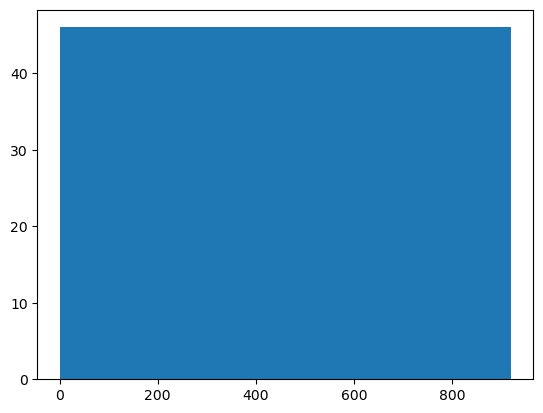

In [13]:
plt.hist(df['id'], bins = 20)

**Answer** \#YOUR ANSWER
Zero information except for their overall number (920). The graph looks so because x-axis (patient's number) and y-axis ( i do not know what, honestly)

# Task 2 (2 points)

Let's search for outliers in numerical variables (do not include `'id'`).

First of all, draw boxplots for every one of them on one figure.

Hint: use `plt.subplots`

Describe the plots:



*   Which features do not have any outliers?
*   Which features seem to have the maximum number of outliers?
*   For which features it may be hard to count the number of outliers? Why?





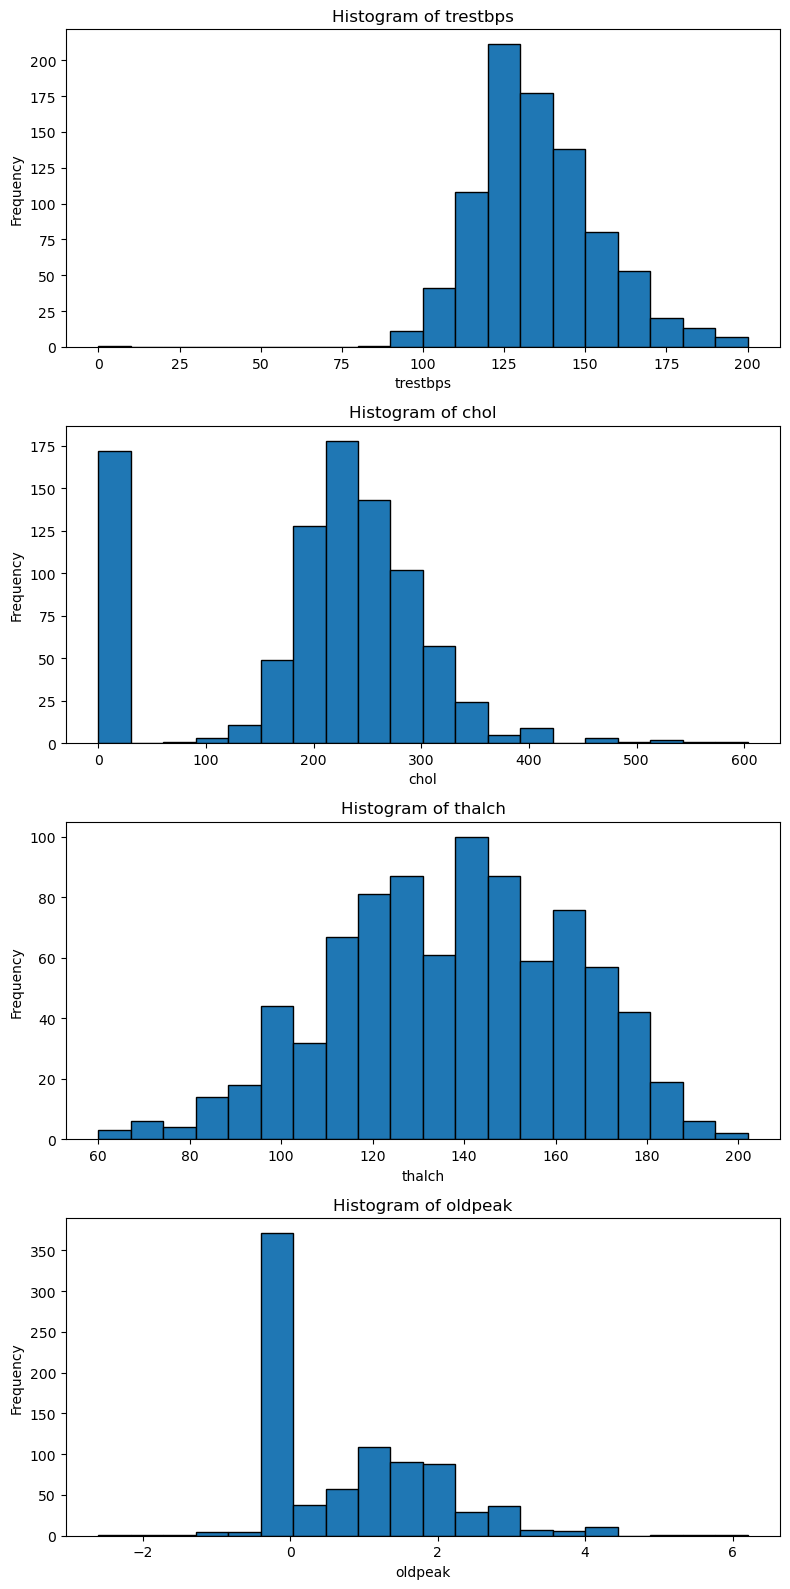

In [15]:
num_feature = num_feature[1:len(num_feature)]

fig, axes = plt.subplots(len(num_feature), 1, figsize=(8, 4*len(num_feature)))

for i, feature in enumerate(num_feature):
    ax = axes[i]
    ax.hist(df[feature].dropna(), bins=20, edgecolor='black')
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**Answer** \#YOUR ANSWER

Use the $1.5IQR$ approach and count the number of outliers for each column.

In [49]:
outlier_counts = {}
def IQR1_5(df, columns):
    df_check = df.copy()
    keeptrack = pd.Series(True, index = df.index)
    
    for column in columns:
         Q1 = df_check[column].quantile(0.25)
         Q3 = df_check[column].quantile(0.75)
         IQR = Q3-Q1
         LB = Q1 - 1.5 *IQR
         UB = Q3 + 1.5 *IQR
         outliers = (df[column] < LB) | (df[column] > UB)
         outlier_counts[column] = outliers.sum()
         keeptrack &= ~outliers
    
    return df_check[keeptrack]

df_delIQR_outliers = IQR1_5(df,num_feature)

outlier_counts

{'id': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16}

For the feature with most outliers, draw the histogram and depict the bounds. Do the bounds seem too tight or too wide? Is deleting all outliers for this feature a good idea?

In [19]:
most_outliers = max(outlier_counts, key=outlier_counts.get)
Outlier_output = most_outliers, outlier_counts[most_outliers]
Outlier_output

('chol', 185)

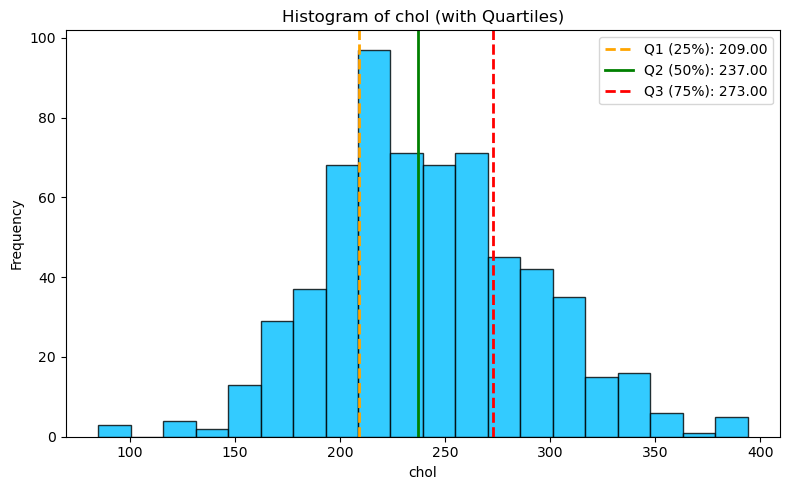

In [21]:
Q1 = df_delIQR_outliers[Outlier_output[0]].quantile(0.25)
Q2 = df_delIQR_outliers[Outlier_output[0]].quantile(0.5)
Q3 = df_delIQR_outliers[Outlier_output[0]].quantile(0.75)

plt.figure(figsize=(8, 5))
plt.hist(df_delIQR_outliers[Outlier_output[0]], bins=20, edgecolor='black', color='deepskyblue', alpha=0.8)
plt.axvline(Q1, color='orange', linestyle='--', linewidth=2, label=f'Q1 (25%): {Q1:.2f}')
plt.axvline(Q2, color='green', linestyle='-', linewidth=2, label=f'Q2 (50%): {Q2:.2f}')
plt.axvline(Q3, color='red', linestyle='--', linewidth=2, label=f'Q3 (75%): {Q3:.2f}')
plt.title(f'Histogram of {Outlier_output[0]} (with Quartiles)')
plt.xlabel(Outlier_output[0])
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

**Answer** \#YOUR ANSWER
Deleting outliers is a good idea in any case, from my point of view. It is not as wide as it might have been before we delete outliers.



# Task 3 (2 points)

Find the group (or groups) of people that will be deleted, if we delete all the outliers for the feature with the most outliers from the previous task.

In [27]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3-Q1
LB = Q1 - 1.5 *IQR
UB = Q3 + 1.5 *IQR
df_outliers = df[(df['chol'] <= LB) | (df['chol'] >= UB)]
len(df_outliers)

183

In [47]:
df_outliers

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,Female,Cleveland,non-anginal,140.0,417.0,True,lv hypertrophy,157.0,False,0.8,upsloping,1.0,normal,0
152,153,67,Female,Cleveland,non-anginal,115.0,564.0,False,lv hypertrophy,160.0,False,1.6,flat,0.0,reversable defect,0
181,182,56,Female,Cleveland,asymptomatic,134.0,409.0,False,lv hypertrophy,150.0,True,1.9,flat,2.0,reversable defect,2
373,374,44,Male,Hungary,asymptomatic,150.0,412.0,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
434,435,53,Female,Hungary,atypical angina,113.0,468.0,NaN,normal,127.0,False,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,840,56,Male,VA Long Beach,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


# Task 4 (2 points)

Check the proportion of missing values in the dataset. What approach can be used to tackle the problem for every variable?

In [101]:
#Before doing it checking NA
for column in df.columns:
    print(f'{column}: {sum(df[column].isna())}')
    print(f'{column}: {round(df[column].isna().mean() * 100, 2)} is NA proportion')

id: 0
id: 0.0 is NA proportion
age: 0
age: 0.0 is NA proportion
sex: 0
sex: 0.0 is NA proportion
dataset: 0
dataset: 0.0 is NA proportion
cp: 0
cp: 0.0 is NA proportion
trestbps: 59
trestbps: 6.41 is NA proportion
chol: 30
chol: 3.26 is NA proportion
fbs: 90
fbs: 9.78 is NA proportion
restecg: 2
restecg: 0.22 is NA proportion
thalch: 55
thalch: 5.98 is NA proportion
exang: 55
exang: 5.98 is NA proportion
oldpeak: 62
oldpeak: 6.74 is NA proportion
slope: 309
slope: 33.59 is NA proportion
ca: 611
ca: 66.41 is NA proportion
thal: 486
thal: 52.83 is NA proportion
num: 0
num: 0.0 is NA proportion


**Answer** \#YOUR ANSWER
we can use median in order to replace NA

# Task 5 (2 points)


Fill the missing values, for categorical features create new category `'NOT GIVEN'`

In [103]:
column_names = df.columns.tolist()
column_names = column_names[1:len(column_names)]


cat_col = ['sex', 'thal', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'dataset']  # if NA then 'NOT GIVEN'

for col in df.columns:
    if col in cat_col:
        df[col] = df[col].fillna('NOT GIVEN')
    else:
        median = df[col].median()
        df[col] = df[col].fillna(median)

print(df)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina     130.0  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic     130.0  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thal

In [ ]:
fill_dict = {}
#YOUR CODE

Convert every numerical variable into z-scores:

In [262]:
from scipy import stats

df_zscore = df_delIQR_outliers.copy()

df_zscore[num_feature] = df_zscore[num_feature].apply(zscore)

In [264]:
z_values_check = df_zscore[num_feature]
our_variables = z_values.max(), z_values.min()
our_variables

(chol       3.250779
 thalch     2.436454
 oldpeak    2.838899
 dtype: float64,
 chol      -3.182609
 thalch    -2.828480
 oldpeak   -0.848156
 dtype: float64)

In [266]:
pos = z_values_check.max().max(), z_values_check.max().idxmax()
neg = z_values_check.min().min(), z_values_check.min().idxmin()

Find the most extreme value in the dataset: in what column is it in?

In [268]:
#YOUR CODE
print(f"Max positive z-score: {pos[0]:.3f} in column '{pos[1]}'")
print(f"Max negative z-score: {neg[0]:.3f} in column '{neg[1]}'")

Max positive z-score: 3.118 in column 'chol'
Max negative z-score: -3.212 in column 'chol'


**Answer** \#YOUR ANSWER

Draw the distributions on one plot. Adjust the visible area of the histogram in such way, that the bar for the most extreme value is visible. It is ok to cut  very high bars.

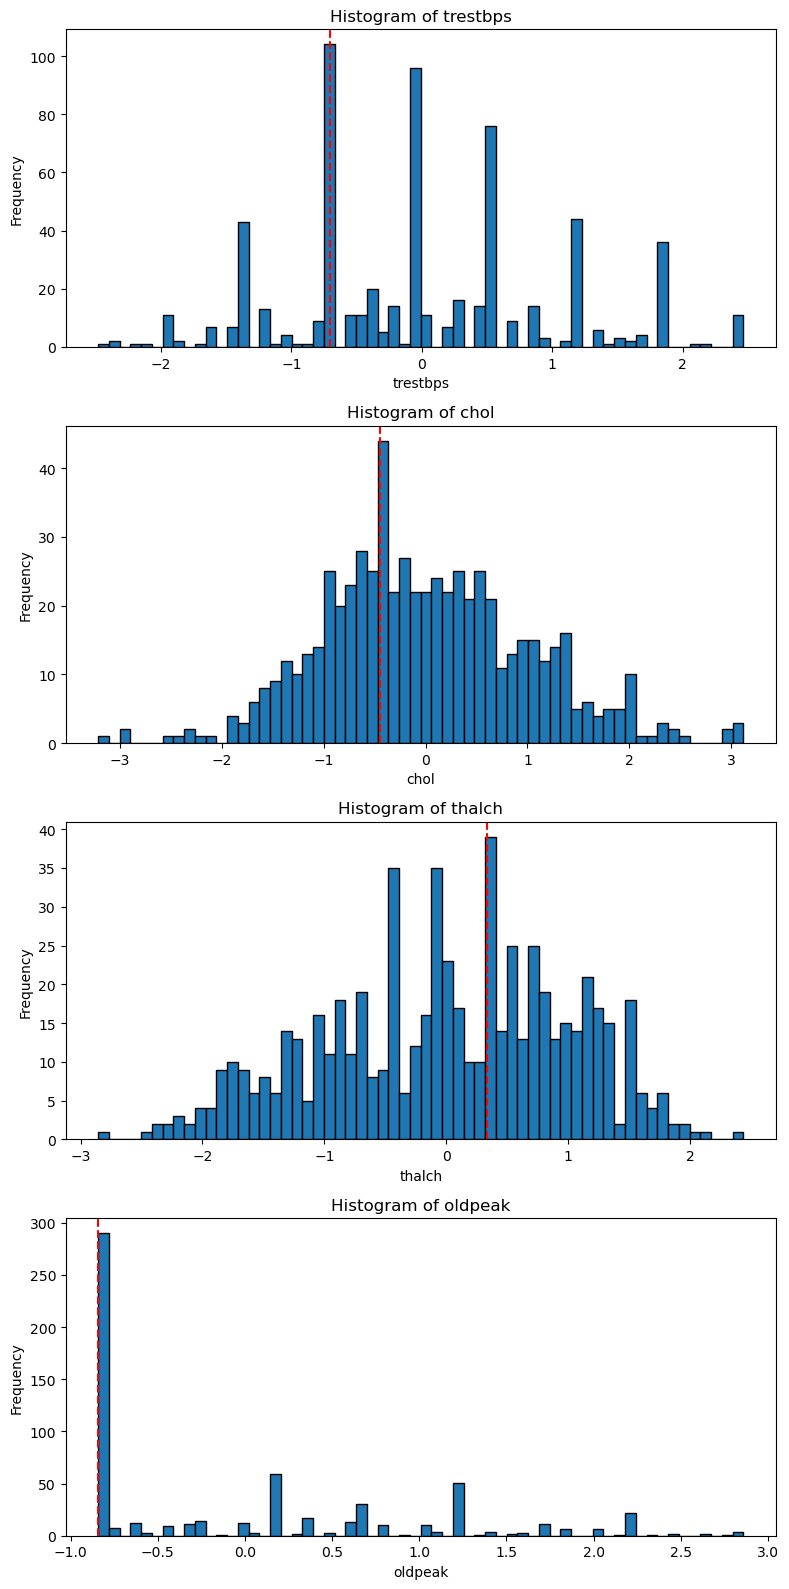

In [290]:
fig, axes = plt.subplots(len(num_feature), 1, figsize=(8, 4*len(num_feature)))

for i, feature in enumerate(num_feature):
    ax = axes[i]
    ax.hist(df_zscore[feature].dropna(), bins=60, edgecolor='black')
    ax.axvline(df_zscore[feature].mode()[0], color='red', linestyle='--', label=f"Mode: {df_zscore[feature].mode()[0]}")
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()